<a href="https://colab.research.google.com/github/dilrubashowkat/MLearn/blob/master/June1_19_US_EducationData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install keras

In [0]:
import tensorflow as tf


In [0]:
from google.colab import files
files.upload()

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

In [0]:
!kaggle datasets download -d noriuk/us-education-datasets-unification-project

#select the "Copy API command" in Keggle data download option

In [0]:
!unzip us-education-datasets-unification-project.zip

In [0]:
ls

In [0]:
# Importing modules
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os, random, cv2
#from matplotlib import style
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#matplotlib inline
# Let's check the labels


In [0]:
df= pd.read_csv("states_all.csv")
df.describe()

In [0]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [0]:
!pip install -U scikit-learn


In [0]:
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_val_score



In [0]:
#https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset
df.isna().sum()*100/df.shape[0]


In [0]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)





In [0]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.violinplot(x="TOTAL_REVENUE", y="STATE", data=df)


In [0]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

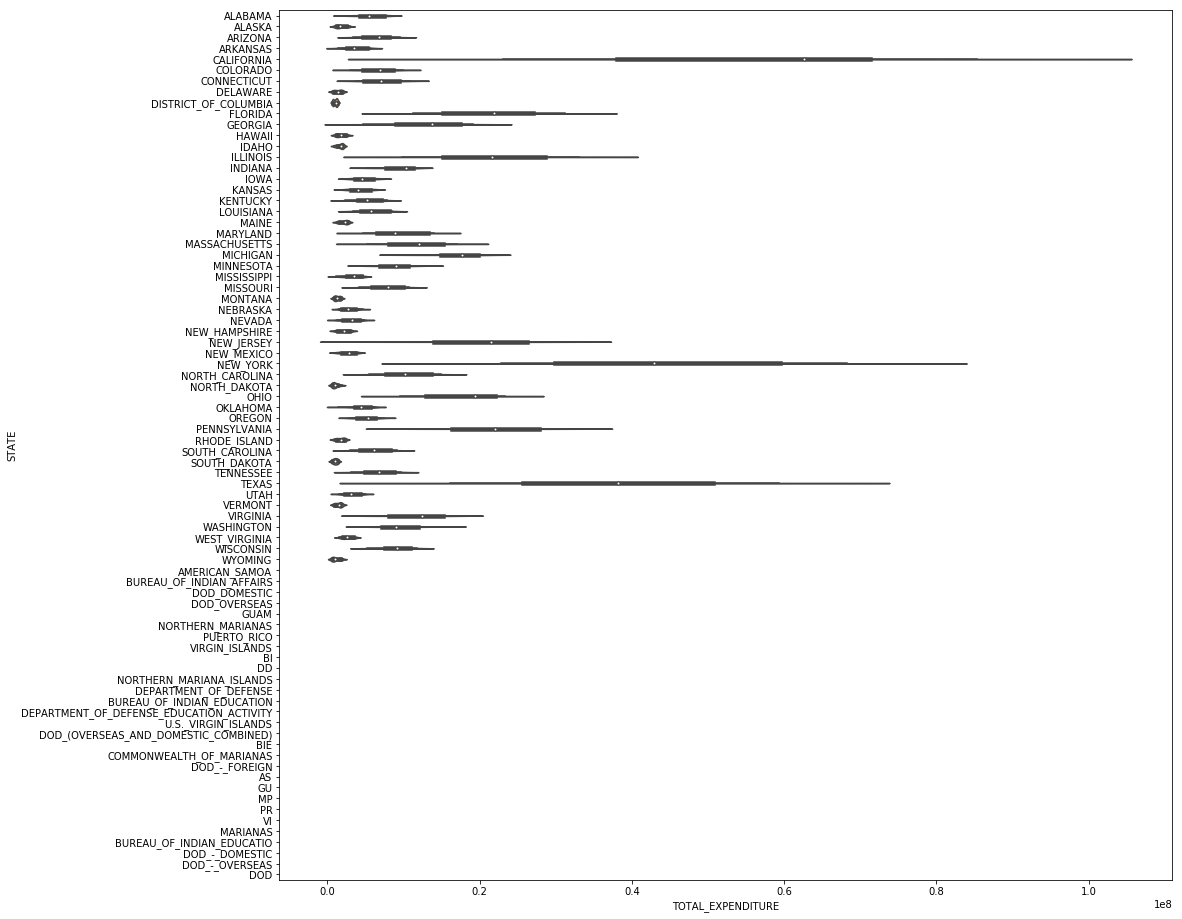

In [0]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.violinplot(x="TOTAL_EXPENDITURE", y="STATE", data=df)


In [0]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.violinplot(x="GRADES_ALL_G", y="STATE", data=df)


In [0]:
df['average_reveneue']=df['TOTAL_REVENUE']/df['GRADES_ALL_G']
df['average_expenditure']=df['TOTAL_EXPENDITURE']/df['GRADES_ALL_G']


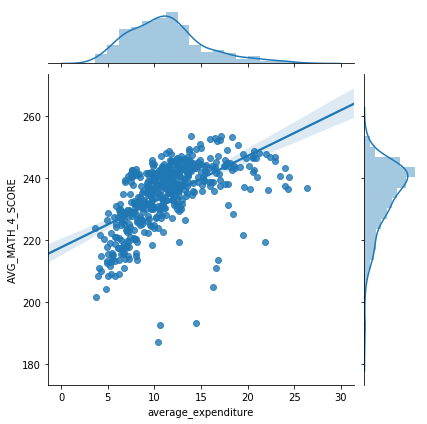

In [0]:
sns.jointplot("average_expenditure", "AVG_MATH_4_SCORE", data=df, kind="reg")


In [0]:
df1=df.drop(['PRIMARY_KEY','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE','ENROLL'],axis=1)
df2=df1.dropna()
#df2.tail()
df3 = pd.get_dummies(df2, columns=['STATE'])
df3.head()



,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,average_reveneue,average_expenditure,STATE_ALABAMA,STATE_ALASKA,STATE_ARIZONA,STATE_ARKANSAS,STATE_CALIFORNIA,STATE_COLORADO,STATE_CONNECTICUT,STATE_DELAWARE,STATE_DISTRICT_OF_COLUMBIA,STATE_FLORIDA,STATE_GEORGIA,STATE_HAWAII,STATE_IDAHO,STATE_ILLINOIS,STATE_INDIANA,STATE_IOWA,STATE_KANSAS,STATE_KENTUCKY,STATE_LOUISIANA,STATE_MAINE,STATE_MARYLAND,STATE_MASSACHUSETTS,STATE_MICHIGAN,STATE_MINNESOTA,STATE_MISSISSIPPI,STATE_MISSOURI,STATE_MONTANA,STATE_NEBRASKA,STATE_NEVADA,STATE_NEW_HAMPSHIRE,STATE_NEW_JERSEY,STATE_NEW_MEXICO,STATE_NEW_YORK,STATE_NORTH_CAROLINA,STATE_NORTH_DAKOTA,STATE_OHIO,STATE_OKLAHOMA,STATE_OREGON,STATE_PENNSYLVANIA,STATE_RHODE_ISLAND,STATE_SOUTH_CAROLINA,STATE_SOUTH_DAKOTA,STATE_TENNESSEE,STATE_TEXAS,STATE_UTAH,STATE_VERMONT,STATE_VIRGINIA,STATE_WASHINGTON,STATE_WEST_VIRGINIA,STATE_WISCONSIN,STATE_WYOMING
204,1996,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,935115.0,322883.0,286699.0,9633.0,60949.0,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,4.898393,5.199958,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,1996,1120346.0,123505.0,706116.0,290725.0,1240031.0,636959.0,365085.0,38996.0,179297.0,2186.0,10451.0,10055.0,9627.0,7370.0,81725.0,35557.0,119468.0,223.833455,9.377792,10.379608,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
206,1996,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,1193260.0,220650.0,877190.0,4495.0,64613.0,62793.0,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,5.701462,6.043072,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
207,1996,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,636106.0,127007.0,203555.0,1980.0,36442.0,33855.0,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,5.225157,5.497968,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
208,1996,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,9222569.0,2362407.0,2580639.0,73233.0,469965.0,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,6.115424,6.169909,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df4=(df3-df3.mean())/df3.std()
df4.head()



,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,average_reveneue,average_expenditure,STATE_ALABAMA,STATE_ALASKA,STATE_ARIZONA,STATE_ARKANSAS,STATE_CALIFORNIA,STATE_COLORADO,STATE_CONNECTICUT,STATE_DELAWARE,STATE_DISTRICT_OF_COLUMBIA,STATE_FLORIDA,STATE_GEORGIA,STATE_HAWAII,STATE_IDAHO,STATE_ILLINOIS,STATE_INDIANA,STATE_IOWA,STATE_KANSAS,STATE_KENTUCKY,STATE_LOUISIANA,STATE_MAINE,STATE_MARYLAND,STATE_MASSACHUSETTS,STATE_MICHIGAN,STATE_MINNESOTA,STATE_MISSISSIPPI,STATE_MISSOURI,STATE_MONTANA,STATE_NEBRASKA,STATE_NEVADA,STATE_NEW_HAMPSHIRE,STATE_NEW_JERSEY,STATE_NEW_MEXICO,STATE_NEW_YORK,STATE_NORTH_CAROLINA,STATE_NORTH_DAKOTA,STATE_OHIO,STATE_OKLAHOMA,STATE_OREGON,STATE_PENNSYLVANIA,STATE_RHODE_ISLAND,STATE_SOUTH_CAROLINA,STATE_SOUTH_DAKOTA,STATE_TENNESSEE,STATE_TEXAS,STATE_UTAH,STATE_VERMONT,STATE_VIRGINIA,STATE_WASHINGTON,STATE_WEST_VIRGINIA,STATE_WISCONSIN,STATE_WYOMING
204,-1.912547,-0.544436,-0.448901,-0.441482,-0.622442,-0.526301,-0.496483,-0.582627,-0.255675,-0.497933,-0.353822,-0.117955,-0.169526,-0.161903,-0.276218,-0.156570,-0.221861,-0.185220,-2.574357,-1.733294,-1.690187,6.904270,-0.136085,-0.144508,-0.144508,-0.136085,-0.136085,-0.144508,-0.136085,-0.152502,-0.136085,-0.144508,-0.144508,-0.136085,-0.136085,-0.144508,-0.144508,-0.136085,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.127149,-0.136085,-0.144508,-0.144508,-0.144508,-0.144508,-0.136085,-0.136085,-0.136085,-0.136085,-0.144508,-0.144508,-0.127149,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.136085,-0.144508,-0.136085,-0.127149
205,-1.912547,-0.724373,-0.616597,-0.689361,-0.724210,-0.709536,-0.697572,-0.744024,-0.768532,-0.572266,-0.575893,-0.730187,-0.738073,-0.752065,-0.760394,-0.738634,-0.752143,-0.743522,-1.278549,-0.605769,-0.368297,-0.144508,7.331594,-0.144508,-0.144508,-0.136085,-0.136085,-0.144508,-0.136085,-0.152502,-0.136085,-0.144508,-0.144508,-0.136085,-0.136085,-0.144508,-0.144508,-0.136085,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.127149,-0.136085,-0.144508,-0.144508,-0.144508,-0.144508,-0.136085,-0.136085,-0.136085,-0.136085,-0.144508,-0.144508,-0.127149,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.136085,-0.144508,-0.136085,-0.127149
206,-1.912547,-0.482058,-0.413943,-0.500372,-0.440440,-0.461934,-0.515401,-0.509537,-0.440364,-0.089253,-0.507038,-0.073533,-0.100698,-0.135121,-0.282680,-0.092672,-0.214759,-0.146139,-1.943920,-1.531151,-1.475018,-0.144508,-0.136085,6.904270,-0.144508,-0.136085,-0.136085,-0.144508,-0.136085,-0.152502,-0.136085,-0.144508,-0.144508,-0.136085,-0.136085,-0.144508,-0.144508,-0.136085,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.127149,-0.136085,-0.144508,-0.144508,-0.144508,-0.144508,-0.136085,-0.136085,-0.136085,-0.136085,-0.144508,-0.144508,-0.127149,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.136085,-0.144508,-0.136085,-0.127149
207,-1.912547,-0.639162,-0.562130,-0.587252,-0.655735,-0.626465,-0.604134,-0.667288,-0.609535,-0.555477,-0.582036,-0.415075,-0.450434,-0.419424,-0.481476,-0.435086,-0.455544,-0.449974,-2.127821,-1.651044,-1.614133,-0.144508,-0.136085,-0.144508,6.904270,-0.136085,-0.136085,-0.144508,-0.136085,-0.152502,-0.136085,-0.144508,-0.144508,-0.136085,-0.136085,-0.144508,-0.144508,-0.136085,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.127149,-0.136085,-0.144508,-0.144508,-0.144508,-0.144508,-0.136085,-0.136085,-0.136085,-0.136085,-0.144508,-0.144508,-0.127149,-0.144508,-0.144508,-0.144508,-0.144508,-0.144508,-0.136085,-0.1445

In [0]:
df4.shape

(439, 72)

In [0]:
y=df4.loc[:,'AVG_MATH_4_SCORE'].values  #target variable
#y
X=df4.drop(['AVG_MATH_4_SCORE'],axis=1).loc[:,:].values  #drop the solution from the source data 
print(X.shape,' ',y.shape)




(439, 71)   (439,)


Random Forest Reggression ***Model***

I am using supervised ML model here

In [0]:
rf=RandomForestRegressor() #set model parameters
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }


In [0]:
grid_obj = GridSearchCV(rf, parameters, cv=5)
grid_obj = grid_obj.fit(X, y)
rf = grid_obj.best_estimator_



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
print('Params ',rf)
print('Score ',rf.score(X, y))



Params  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
Score  0.923738126190263


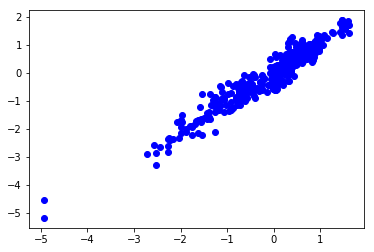

In [0]:
Y_rf=rf.predict(X)
plt.plot(Y_rf, y, 'bo')
plt.show()



In [0]:
feature_importances_rf = pd.DataFrame(rf.feature_importances_,
                                   index = df4.drop(['AVG_MATH_4_SCORE'],axis=1).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances_rf.head()


,importance
YEAR,0.469007
average_reveneue,0.073279
GRADES_ALL_G,0.070272
average_expenditure,0.065900
GRADES_9_12_G,0.036831


SVR ***model***

In [44]:
#https://scikit-learn.org/stable/modules/svm.html
from sklearn.metrics import accuracy_score

from sklearn import svm
clf = svm.SVR()
clf.fit(X, y) 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
clf.score(X,y)

0.9038150613454473

In [0]:
xx = X[0:10]
#x.shape
yy=clf.predict(xx)

In [0]:
#yy = y[0:5]
yy

array([-2.27490794, -0.95495218, -1.68569362, -1.56999795, -1.89838528,
       -0.87679225, -0.47974638, -0.86951249, -3.07314857, -0.95950735])

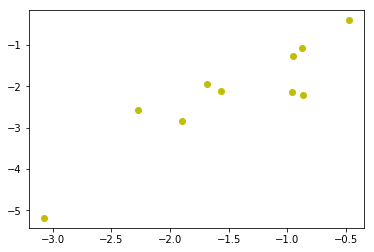

In [48]:
from sklearn.metrics import accuracy_score

yT=y[0:10]
#yT
#accuracy_score(yT,yy,normalize=False)
plt.plot(yy,yT,'yo')
plt.show()


In [0]:
from sklearn.linear_model import Lasso, ElasticNet
clf = Lasso()
parameters = {'alpha': [0.00001,0.0001,0.001, 0.01],
              'tol': [0.00001,0.0001,0.001, 0.01]
             }
grid_obj = GridSearchCV(clf, parameters, cv=5)
grid_obj = grid_obj.fit(X, y)
clf = grid_obj.best_estimator_



In [50]:
print('Params ',clf)
print('Score ',clf.score(X, y))


Params  Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=1e-05, warm_start=False)
Score  0.8976125612525898


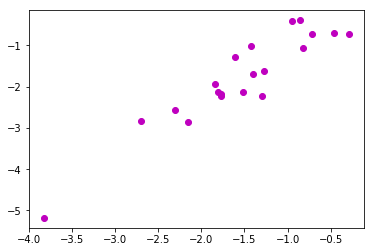

In [51]:
xx = X[0:20]
yTrue = y[0:20]
yy=clf.predict(xx)
plt.plot(yy, yTrue, 'mo')
plt.show()

